In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [297]:
police = pd.read_csv("policez.csv").drop("Unnamed: 0", axis = 1)

In [298]:
police

,x
0,2.411365
1,0.160788
2,-0.852171
3,0.151016
4,1.836084
...,...
2744,2.008162
2745,0.963842
2746,-2.735369
2747,1.074744


## 2A

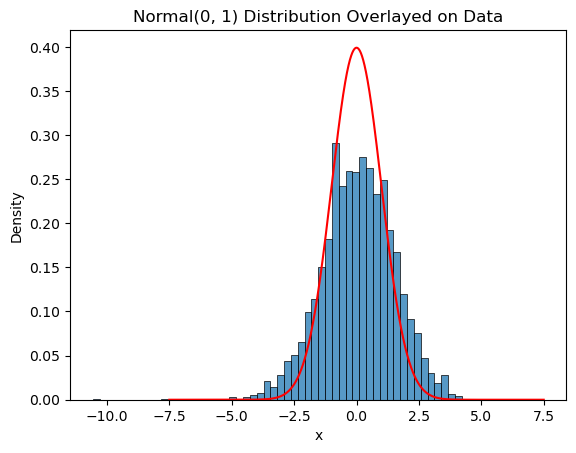

In [299]:
x = np.arange(-7.5, 7.5, 0.001)
sns.lineplot(x = x, y = stats.norm.pdf(x, 0, 1), color = "r")
sns.histplot(data = police, x = "x", stat="density")
plt.title("Normal(0, 1) Distribution Overlayed on Data");

The fit isn't great because the given distribution is wider and shorter than the normal distribution.

## 2B

In [300]:
threshold = 0
discoveries = 0
police["p-values"] = 1 - stats.norm.cdf(police["x"], 0, 1)
p_sorted = police.sort_values(by = "p-values", ascending=True)
k = np.arange(1, len(p_sorted) + 1)  
p_sorted['k'] = k

for i in np.arange(1, len(p_sorted) + 1):
    if p_sorted["p-values"].iloc[i - 1] <= (alpha/m) * i:
        threshold = p_sorted["p-values"].iloc[i - 1]
        discoveries = p_sorted["k"].iloc[i - 1]
threshold, discoveries

(0.01438228904994543, 201)

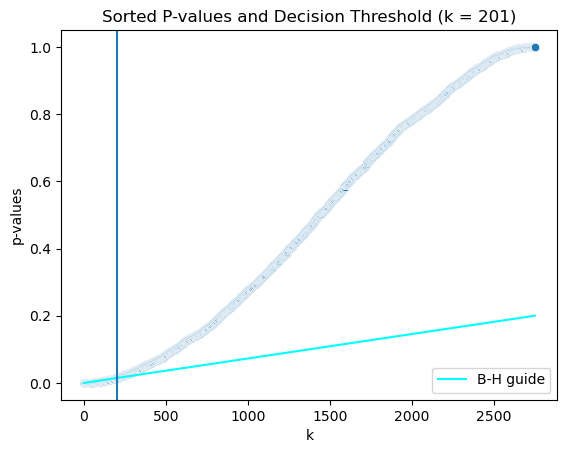

In [301]:
alpha = 0.2

sns.scatterplot(x=k, y=p_sorted['p-values']);
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')
plt.axvline(x = 201)
plt.xlabel("k")
plt.title("Sorted P-values and Decision Threshold (k = 201)")

plt.legend();

In [302]:
p_sorted[p_sorted["k"] == 201]

,x,p-values,k
1266,2.186698,0.014382,201


#### I made 201 discoveries.

## 2C

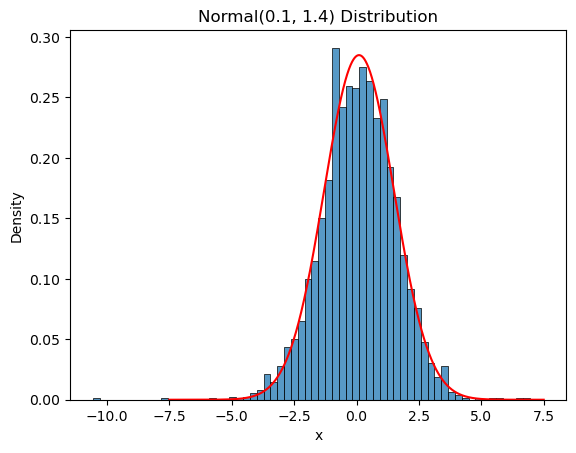

In [303]:
x = np.arange(-7.5, 7.5, 0.001)
sns.histplot(data = police, x = "x", stat = "density")
plt.plot(x, stats.norm.pdf(x, 0.1, 1.4), color = "r")
plt.title("Normal(0.1, 1.4) Distribution");

This normal distribution is a much better fit and hugs the original distribution nicely throughout the entire histogram.

In [304]:
threshold = 0
discoveries = 0
police["p-values"] = 1 - stats.norm.cdf(police["x"], 0.1, 1.4)
p_sorted = police.sort_values(by = "p-values", ascending=True)
k = np.arange(1, len(p_sorted) + 1)  
p_sorted['k'] = k

for i in np.arange(1, len(p_sorted) + 1):
    if p_sorted["p-values"].iloc[i - 1] <= (alpha/m) * i:
        threshold = p_sorted["p-values"].iloc[i - 1]
        discoveries = p_sorted["k"].iloc[i - 1]
threshold, discoveries

(0.00027717342446764714, 5)

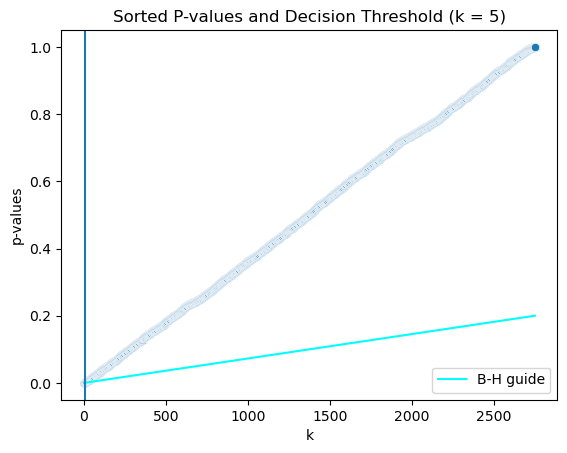

In [305]:
alpha = 0.2

sns.scatterplot(x=k, y=p_sorted['p-values']);
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')
plt.axvline(x = 5)
plt.xlabel("k")
plt.title("Sorted P-values and Decision Threshold (k = 5)")

plt.legend();

In [306]:
p_sorted[p_sorted["k"] == 5]

,x,p-values,k
96,4.934229,0.000277,5


#### I made 5 discoveries.

## 2D

## 3A

In [307]:
adult = pd.read_csv("adult_corrected.csv")

In [308]:
adult

,Unnamed: 0,index,Age,Post HS?,Ever Married?,Gender,Hours per Week,50K?
0,0,38,51,1,1,Male,40,1
1,1,23,20,0,0,Female,30,0
2,2,22,58,1,1,Female,40,0
3,3,77,23,1,0,Female,35,0
4,4,80,27,0,0,Male,1,0
...,...,...,...,...,...,...,...,...
85,85,85,50,1,1,Male,80,1
86,86,85,50,1,1,Male,80,1
87,87,5,28,0,1,Male,40,0
88,88,28,60,0,1,Male,40,0


In [309]:
def avg_difference_in_means(binary_col, numerical_col):
    df = pd.read_csv("adult_corrected.csv").drop("Unnamed: 0", axis = 1)
    
    # solved using Data 8 Textbook, Chapter 12.1.5
    differences = np.array([])
    grouped_df = df[[numerical_col, binary_col]].groupby(binary_col).agg(np.average)
    obs_difference = abs(grouped_df[numerical_col][1] - grouped_df[numerical_col][0])

    repetitions = 25000
    for i in np.arange(repetitions):
        temp = df
        temp["shuffled_labels"] = df[binary_col].sample(n = df.shape[0], replace = False).values
        
        temp = temp[[numerical_col, "shuffled_labels"]].groupby("shuffled_labels").agg(np.average)
        sim_difference = abs(temp[numerical_col][1] - temp[numerical_col][0])
        differences = np.append(differences, sim_difference)
        
    p_val = np.count_nonzero(differences >= obs_difference) / repetitions
    print(p_val)
    return p_val
             

In [310]:
p_gender_age = avg_difference_in_means("Gender", "Age")

0.04464


In [311]:
p_posths_age = avg_difference_in_means("Post HS?", "Age")

0.71272


In [312]:
p_evermarried_age = avg_difference_in_means("Ever Married?", "Age")

0.0


In [313]:
p_50k_age = avg_difference_in_means("50K?", "Age")

0.0


In [314]:
p_gender_hpw = avg_difference_in_means("Gender", "Hours per Week")

0.01624


In [315]:
p_posths_hpw = avg_difference_in_means("Post HS?", "Hours per Week")

0.93296


In [316]:
p_evermarried_hpw = avg_difference_in_means("Ever Married?", "Hours per Week")

0.0984


In [317]:
p_50k_hpw = avg_difference_in_means("50K?", "Hours per Week")

0.2376


In [318]:
categoricals = ["Post HS?", "Post HS?", "50K?", "50K?", "Gender", "Gender", "Ever Married?", "Ever Married"]
numericals = ["Age", "Hours per Week", "Age", "Hours per Week", "Age", "Hours per Week", "Age", "Hours per Week"]
ans = pd.DataFrame({"Categorical Variables": categoricals, "Numericals": numericals})

In [319]:
ans["p_values"] = [p_posths_age, p_posths_hpw, p_50k_age, p_50k_hpw, p_gender_age, p_gender_hpw, p_evermarried_age, p_evermarried_hpw]

In [320]:
ans

,Categorical Variables,Numericals,p_values
0,Post HS?,Age,0.71272
1,Post HS?,Hours per Week,0.93296
2,50K?,Age,0.00000
3,50K?,Hours per Week,0.23760
4,Gender,Age,0.04464
5,Gender,Hours per Week,0.01624
6,Ever Married?,Age,0.00000
7,Ever Married,Hours per Week,0.09840


In [321]:
ans["Naive Rejection? (p = 0.05)"] = ans["p_values"] <= 0.05

In [322]:
ans["FWER of 0.05"] = ans["p_values"] <= (0.05 / 8)

In [323]:
ans

,Categorical Variables,Numericals,p_values,Naive Rejection? (p = 0.05),FWER of 0.05
0,Post HS?,Age,0.71272,False,False
1,Post HS?,Hours per Week,0.93296,False,False
2,50K?,Age,0.00000,True,True
3,50K?,Hours per Week,0.23760,False,False
4,Gender,Age,0.04464,True,False
5,Gender,Hours per Week,0.01624,True,False
6,Ever Married?,Age,0.00000,True,True
7,Ever Married,Hours per Week,0.09840,False,False


In [324]:
threshold = 0
discoveries = []
p_sorted = ans.sort_values(by = "p_values", ascending=True)
k = np.arange(1, len(p_sorted) + 1)  
p_sorted['k'] = k

for i in np.arange(1, len(p_sorted) + 1):
    if p_sorted["p_values"].iloc[i - 1] <= (alpha/m) * i:
        threshold = p_sorted["p_values"].iloc[i - 1]
        discoveries = p_sorted["k"].iloc[i - 1]
discoveries = ans["p_values"] <= threshold
ans["BH Correction"] = discoveries
ans

,Categorical Variables,Numericals,p_values,Naive Rejection? (p = 0.05),FWER of 0.05,BH Correction
0,Post HS?,Age,0.71272,False,False,False
1,Post HS?,Hours per Week,0.93296,False,False,False
2,50K?,Age,0.00000,True,True,True
3,50K?,Hours per Week,0.23760,False,False,False
4,Gender,Age,0.04464,True,False,False
5,Gender,Hours per Week,0.01624,True,False,False
6,Ever Married?,Age,0.00000,True,True,True
7,Ever Married,Hours per Week,0.09840,False,False,False


## 3G

I think that the "Education" column could've been binarized differently to separate high school educated and college educated people, and then only include an indicator for either uneducated or college educated. Thinking intuitively, there could possible be a greater statistical significance between being the two levels of education. This might affect my results because a college educated person would be expected to work less hours and get paid more compared to uneducated people without a high school or college degree.